In [ ]:
import pandas as pd

df = pd.read_csv("Movie_Ratings.csv")
df.head()  # Preview first 5 rows
df.info()  # Data types, nulls
df.describe()  # Summary stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      220 non-null    object 
 1   movie_title  220 non-null    object 
 2   genre        220 non-null    object 
 3   platform     220 non-null    object 
 4   rating       220 non-null    float64
 5   watched_on   220 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.4+ KB


,rating
count,220.000000
mean,2.978182
std,1.136676
min,1.100000
25%,1.975000
50%,2.800000
75%,4.000000
max,5.000000


In [ ]:
# Convert date column
df['watched_on'] = pd.to_datetime(df['watched_on'])

# Check for missing values
print(df.isnull().sum())

# Optional: drop missing values
df = df.dropna()


user_id        0
movie_title    0
genre          0
platform       0
rating         0
watched_on     0
dtype: int64


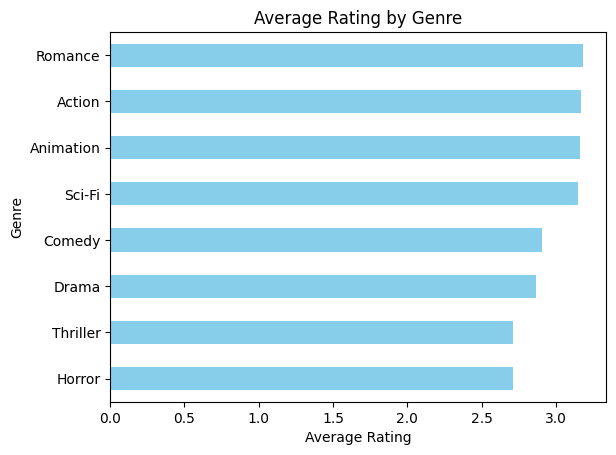

In [ ]:
import matplotlib.pyplot as plt

genre_avg = df.groupby('genre')['rating'].mean().sort_values()
genre_avg.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


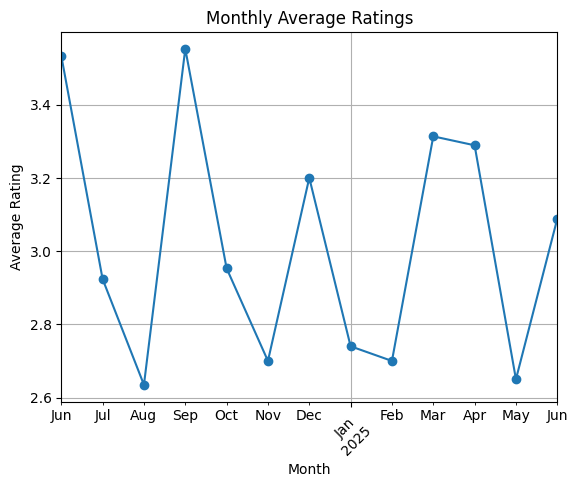

In [ ]:
df['month'] = df['watched_on'].dt.to_period('M')
monthly_avg = df.groupby('month')['rating'].mean()

monthly_avg.plot(marker='o')
plt.title('Monthly Average Ratings')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


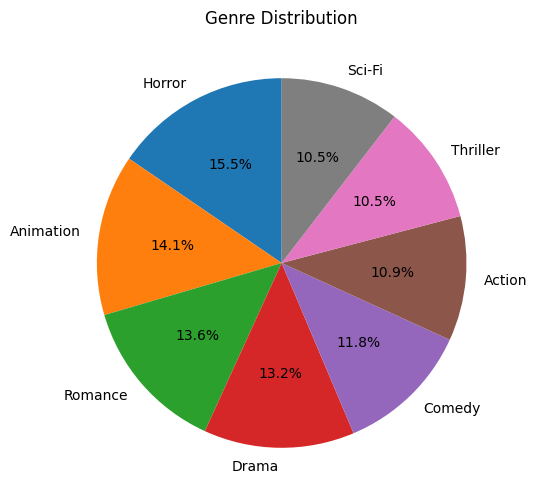

In [ ]:
genre_dist = df['genre'].value_counts()
genre_dist.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Genre Distribution')
plt.ylabel('')
plt.show()

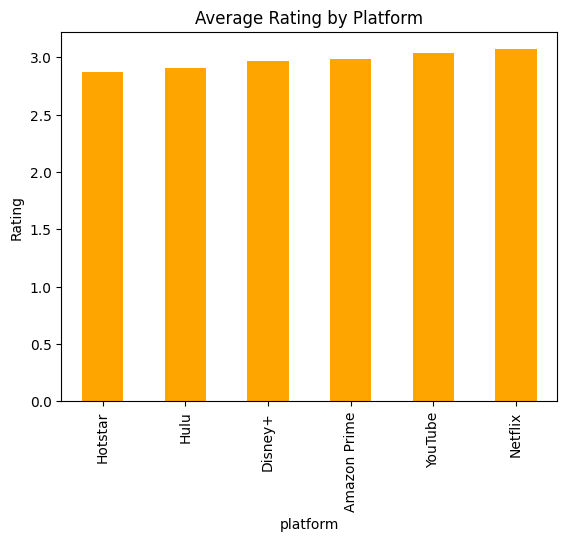

In [ ]:
platform_avg = df.groupby('platform')['rating'].mean().sort_values()
platform_avg.plot(kind='bar', color='orange')
plt.title('Average Rating by Platform')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Make sure you have pandas imported and your data loaded
import pandas as pd

# Load your dataset (if not already)
df = pd.read_csv("Movie_Ratings.csv")

# Sort movies by rating (descending)
top_movies = df.sort_values(by="rating", ascending=False)

# Drop duplicates to keep only one entry per movie title
top_movies_unique = top_movies.drop_duplicates(subset=["movie_title"])

# Get Top 10 highest-rated movies
top_10 = top_movies_unique.head(10)

# Display them
print(top_10[['movie_title', 'genre', 'platform', 'rating']])


                 movie_title      genre      platform  rating
24             Garden toward     Sci-Fi  Amazon Prime     5.0
41          Control everyone    Romance          Hulu     5.0
184       Level method paper    Romance       YouTube     5.0
75         Lay inside around    Romance       YouTube     4.9
99      Less business ground      Drama       YouTube     4.9
216     Realize both certain   Thriller          Hulu     4.9
31       Capital case person  Animation       Netflix     4.8
163                 Somebody     Action       YouTube     4.8
176                 City now    Romance       Hotstar     4.8
64   Read prevent star glass      Drama       Netflix     4.8


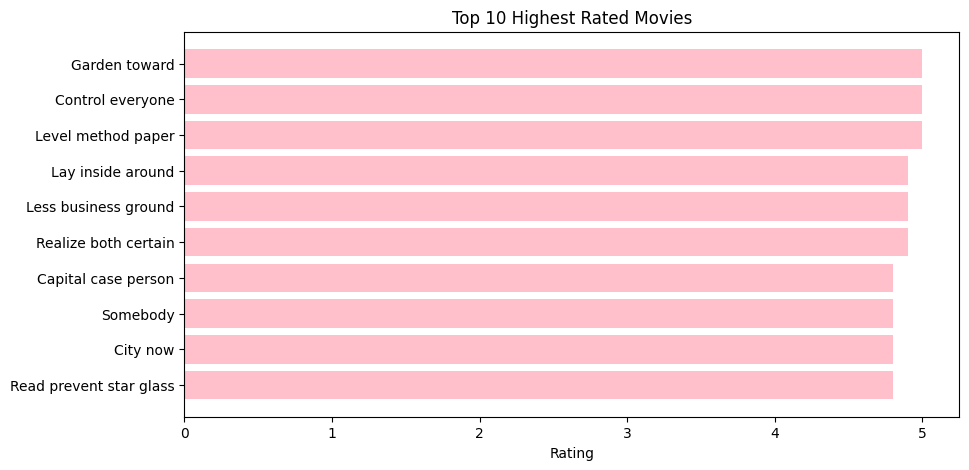

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(top_10['movie_title'], top_10['rating'], color='pink')
plt.xlabel("Rating")
plt.title("Top 10 Highest Rated Movies")
plt.gca().invert_yaxis()  # Highest on top
plt.show()
